

# Project: Showing up Appointments' Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This Dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about each patient are included in the row with their corresponding ID.


> **Questions to be asked**:

1.  Does the period of time (in context of days) patients have to wait between the day they make their appointment order and the actual day of appointment have an effect on absence ?

2.   What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment ?

3.   Are there any missing, duplicated, uninterpretable or possibly errant data ?


> **Data Dictionary**:

1. **PatientId**: *Identification of a patient*


2.  **AppointmentID**: *Identification of each appointment*


3.   **Gender**: *Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.*

4.   **AppointmentDay**: *The day of the actuall appointment, when they have to visit the doctor.*


5.   **ScheduledDay**: *The day someone called or registered the appointment.*



6.   **Age**: *How old is the patient.*


7.  **Neighbourhood**: *Where the appointment takes place.*


8.   **Scholarship**: *True of False .- whether or not the patient is enrolled in Brasilian welfare program.*

9.   **Hipertension**: *True or False* 

10.   **Diabetes**: *True or False*

11.   **Alcoholism**: *True or False*

12.   **Handcap**: *True or False*


13.   **SMS_received**: *True or False - whether or not the patient has received an SMS*


14.   **No-show**: *True or False.*

>

***NOTE! :*** *all True or False variables are represented here by **0**'s and **1**'s.*

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling


> ### General Properties



* ***Reading data***

In [5]:
df= pd.read_csv("noshowappointments-kaggle.csv")
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


>***Inspecting data types and looking for instances of missing or possibly errant data.***

In [6]:
def general_prop(df):
  return(df.info(), df.nunique(), df.describe())

> *There's no missing data(null values)*

>*ScheduledDay & AppointmentDay have inappropriate datatypes*

> *There are some 'Age' values that are far from the realistic range*



**Investigating some "Age" information..**

In [7]:
sum(df['Age']>=100)

11

In [8]:
df[df['Age']>=100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [9]:
df[df['Age']>=100]['No-show'].value_counts()

No     8
Yes    3
Name: No-show, dtype: int64

> *A very small number of people who are above 100 (11 patients), the majority of them have attended their appointments!*

> *So just not to have them as outliers, we're going to drop them*

* ***Check for duplicates***

In [10]:
def check_dup(df):
  print("Overall full duplications in dataset:", df.duplicated().value_counts(),"\n")
  print("duplicated patient IDs: ", sum(df['PatientId'].duplicated()),"\n\n")



>*There are some duplicated patient IDs but the rest of the corresponding row's info is still different*



* ***converting PatientId column datatype to str***

In [11]:
def to_str(df):
  df['PatientId'] = df['PatientId'].astype(str)
  df.dtypes
  print(df['PatientId'].head(3))

Investigating some information about some instances of duplicated IDs

In [12]:
#creating a list including indecies of duplicates of numbers between 1 & 10
l=[]
for i, c in enumerate(df['PatientId'].value_counts()):
  if c<=10 & c>1:
    l.append(i)
print(l[:10])

[248, 249, 250, 251, 252, 253, 254, 255, 256, 257]


In [13]:
# getting some instances of patients duplicated Ids
df.iloc[248][0]

927483951542.0

In [14]:
df.iloc[273][0]

8442143268529.0

In [15]:
df[df['PatientId']=='927483951542.0']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> *Here, last 2 rows must be an error data since the time of which the patient had set up their appointment is even after the appoint. time ((**1st case**))*



In [16]:
df[df['PatientId']=='8442143268529.0']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show



>*Showed at 1st appoint. and didn't show at the other; This is not a duplication,it's just a different record for a different appointment, since the appointment date is different*



In [17]:
df[df['PatientId']=="12154843752835.0"] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> *Duplicated paient IDs having the exact same records except for some columns ["AppointmentID" , "ScheduledDay" and "SMS_received"] ((**2nd case**))*

> *Duplicated patient IDs appointing to the same date but having different "No-show" values ((**3rd case**))*







---



**Calling the functions to show investigation and change PatientId's type to string)**

In [18]:
x, y ,z= general_prop(df)
print(x ,"\n\n", y, "\n\n", z)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None 

 PatientId          62299
AppointmentID     110527
Gender                 2
Schedul

In [19]:
check_dup(df)

Overall full duplications in dataset: False    110527
dtype: int64 

duplicated patient IDs:  48228 




In [20]:
to_str(df)

0     29872499824296.0
1    558997776694438.0
2      4262962299951.0
Name: PatientId, dtype: object


**Viewing a pie chart for "Yes's" and "No's" in the (no_show) column "dependent variable"** 

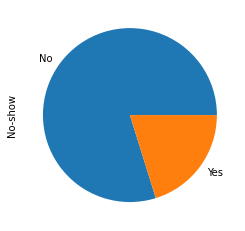

In [21]:
df["No-show"].value_counts().plot(kind='pie'); # major is "NO"


### Data Cleaning **( Renaming columns lables, Changing inappropriate datatypes of attributes , dropping irrelivant or errant columns/rows)**

* ***Renaming columns lables to be converted to lowercase and having any 2 words separated with "_" :***

In [22]:
df.rename(columns=lambda x: x.lower().replace("id","_id").replace("day","_day").replace("-","_"), inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

 * ***Changing datatypes of scheduled_day & appointment_day to datetime :***

In [23]:
df['appointment_day']= pd.to_datetime(df['appointment_day'])
df['scheduled_day']= pd.to_datetime(df['scheduled_day'])
df.info()
#scheduled_day & appointment_day attributes converted to datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  object             
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hipertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handcap          110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

* ***Dropping inappropriate or unreliable rows/columns :***


1. * **Dropping those rows with unrealistic Ages :**


In [24]:
df.drop(df[df['age'] <= 0].index, inplace = True)
df.describe() 

,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




1.   * **Dropping Age Outliers :**



In [25]:
df.drop(df[df['age'] >= 100].index, inplace = True)
df.describe()

,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.069760e+05,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000
mean,5.675432e+06,38.309004,0.101041,0.203784,0.074250,0.031409,0.022921,0.323278
std,7.133383e+04,22.456395,0.301385,0.402812,0.262179,0.174421,0.163960,0.467730
min,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640488e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725632e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




2.  **Dropping error input rows :** 



* **Confirming that sched. time was after the appoint. time ((** mentioned as **1st** case in the duplication-investigating part above**))**

In [26]:
x= df[df['patient_id']=='927483951542.0']
x.iloc[1]['scheduled_day'] > x.iloc[1]['appointment_day']

True

In [27]:
#Dropping such rows
df.drop(df[df['appointment_day'] < df['scheduled_day']].index, inplace = True)
df.shape

(69819, 14)



3.   **Dropping "appoint.id" column :** ((***2nd*** *case*-part1))









In [28]:
df.drop(['appointment_id'], axis=1,inplace=True)
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
5,95985133231274.0,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No


In [29]:
# checking for duplicated rows after dropping the appoit.id col
df.duplicated().sum()

542


4.   **Dropping duplicate rows :**



In [30]:
df.drop_duplicates(inplace=True)
df.shape

(69277, 13)

> Investigating more to try solve the rest of the 2nd case:



In [31]:
# inv= df.where(df['patient_id']=='12154843752835.0').groupby(["patient_id", "appointment_day"])['no_show'].value_counts()
# inv

***Splitting showing and not showing up patients into two separate dataframes :***

1. *Creating separate dataframe of patients who showed up*

In [32]:
showed= df[df['no_show']=="No"].copy()
print(showed.shape ,'\n\n', showed['no_show'].value_counts())

(49548, 13) 

 No    49548
Name: no_show, dtype: int64


2. *Creating separate dataframe of patients who didn't show up*

In [33]:
not_showed= df[df['no_show']=="Yes"].copy()
print(not_showed.shape ,'\n\n', not_showed['no_show'].value_counts())

(19729, 13) 

 Yes    19729
Name: no_show, dtype: int64


* **Dropping ["no-show"] column from both dataframes since we already know the ['no-show'] value for all rows in each one:**

In [34]:
showed.drop(['no_show'],axis=1,inplace=True)
not_showed.drop(['no_show'],axis=1,inplace=True)
print(not_showed.columns, "\t", not_showed.shape ,'\n\n', showed.columns, "\t", showed.shape)

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received'],
      dtype='object') 	 (19729, 12) 

 Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received'],
      dtype='object') 	 (49548, 12)


**Summary discription of appointment days within showing and non-showing patients**

In [35]:
print(showed.appointment_day.describe() , "\n\n\n",not_showed.appointment_day.describe())

count                         49548
unique                           27
top       2016-06-06 00:00:00+00:00
freq                           2171
first     2016-04-29 00:00:00+00:00
last      2016-06-08 00:00:00+00:00
Name: appointment_day, dtype: object 


 count                         19729
unique                           27
top       2016-05-16 00:00:00+00:00
freq                            929
first     2016-04-29 00:00:00+00:00
last      2016-06-08 00:00:00+00:00
Name: appointment_day, dtype: object


<ipython-input-35-ce132667bcdb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(showed.appointment_day.describe() , "\n\n\n",not_showed.appointment_day.describe())
<ipython-input-35-ce132667bcdb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(showed.appointment_day.describe() , "\n\n\n",not_showed.appointment_day.describe())


**Summary discription of scheduled days within showing and non-showing patients**

In [36]:
print(not_showed.scheduled_day.describe(), "\n\n\n", showed.scheduled_day.describe())
#unique values are much

count                         19729
unique                        19204
top       2016-04-25 17:17:46+00:00
freq                             21
first     2015-12-03 08:17:28+00:00
last      2016-06-07 16:48:02+00:00
Name: scheduled_day, dtype: object 


 count                         49548
unique                        48094
top       2016-03-29 10:44:23+00:00
freq                             11
first     2015-11-10 07:13:56+00:00
last      2016-06-07 19:03:57+00:00
Name: scheduled_day, dtype: object


<ipython-input-36-69c19ab09c2a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(not_showed.scheduled_day.describe(), "\n\n\n", showed.scheduled_day.describe())
<ipython-input-36-69c19ab09c2a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(not_showed.scheduled_day.describe(), "\n\n\n", showed.scheduled_day.describe())




> *On its own, **"scheduled_day"** seems to be irrelivant or unreliable to build any intuition on, could be if we could find a relationship between it and the **appointment day**.* 
* I don't think we'd really care about the date on which the patient has called or 'somehow' ordered his appointment..! But maybe we might care about the period of time between the 2 dates! It may have an effect..


**Relationships between scheduling and appointment dates in both cases of showing and non-showing patients**

In [37]:
#assigning a new column to the 2 dataframes in which we compute the difference in time 
#between the scheduled and appointment days

new_showed= showed.assign(diff=showed['appointment_day']-showed['scheduled_day']).copy()
new_not_showed= not_showed.assign(diff=not_showed['appointment_day']-not_showed['scheduled_day']).copy()
new_showed.head(1) 

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
5,95985133231274.0,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1 days 15:23:09


Viewing shapes of each new datasets

In [38]:
print("new_showed's Shape:", new_showed.shape, "\t","new_not_showed's Shape:",new_not_showed.shape)

new_showed's Shape: (49548, 13) 	 new_not_showed's Shape: (19729, 13)


In [39]:
showed_diff= showed['appointment_day']-showed['scheduled_day']
not_showed_diff= not_showed['appointment_day']-not_showed['scheduled_day']

> *Now that we have our new attribute ["diff"] which holds the period of time between the 2 dates--in order to see if that has an effect on the absence of patients, we're now able to **drop** the ["scheduled_day"] column ((**2nd** *case*-part2)), to be able to **drop** those **rows of duplication** of the same appointment day , and keep the row with the "No" record of the ['no-show'] column if there were different ['no-show']-records for these duplicated rows((**3rd** *case*)).* 
* "meaning that if there was different row records of the same patient with 'almost' the same data ***appointing to the same date*** , and we had a "*NO*" value for them **-**indicating that they had come to their appointment**-** in any of these row records , then it's going to be redundant to keep the "Yes"-[ 'no-show' ] assigned row.




* ***Dropping ['scheduled_day'] col. from showed & not_showed dataframes :***

In [40]:
# checking for number of duplicates before dropping the ['scheduled_day'] col.
sum(showed.duplicated()) # 0
sum(not_showed.duplicated()) #0

0

In [41]:
showed.drop(['scheduled_day'], axis=1,inplace=True)
not_showed.drop(['scheduled_day'], axis=1,inplace=True)

Showing columns and new shapes of the 2 datasets

In [42]:
print(not_showed.columns , "\t","shape:",not_showed.shape ,"\n\n", showed.columns,"shape:", showed.shape)

Index(['patient_id', 'gender', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received'],
      dtype='object') 	 shape: (19729, 11) 

 Index(['patient_id', 'gender', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received'],
      dtype='object') shape: (49548, 11)


**Checking for number of duplicates after dropping**

In [43]:
print("showed duplicates: ",showed.duplicated().sum(), "\t","not_showed duplicates: ", sum(not_showed.duplicated()))

showed duplicates:  640 	 not_showed duplicates:  286


**Saving indecies of duplicates in each dataframe, in order to drop them from the new created dataframes with the ['diff'] attribute.**

In [44]:
showed_dup_ind=showed[showed.duplicated()].index
showed_dup_ind

Int64Index([   808,    940,   1478,   2022,   2097,   2103,   2141,   2199,
              2780,   3082,
            ...
            109197, 109214, 109246, 109257, 109315, 109770, 110037, 110046,
            110082, 110178],
           dtype='int64', length=640)

In [45]:
not_showed_dup_ind=not_showed[not_showed.duplicated()].index
not_showed_dup_ind

Int64Index([  1773,   1955,   2101,   2250,   3749,   7397,   7780,   8407,
              8420,   9518,
            ...
            103589, 106130, 106133, 106421, 106787, 106961, 106964, 109503,
            109992, 110430],
           dtype='int64', length=286)

* ***Dropping duplicates from new dataframes***

In [46]:
new_showed.drop(showed_dup_ind,inplace=True)
new_showed.shape # 48908: "49548 - 640"

(48908, 13)

In [47]:
new_not_showed.drop(not_showed_dup_ind, inplace=True)
new_not_showed.shape # 19443: "19729 - 286"

(19443, 13)

> Investigating more to try solve the rest of the 2nd case:



**Searching if there are remaining duplicates in the non-showing up patients dataset**

In [48]:
dup_appoint= new_not_showed.groupby('patient_id')['appointment_day'].value_counts()
dup_appoint[dup_appoint>1]

patient_id         appointment_day          
111415561531417.0  2016-06-06 00:00:00+00:00    2
11474894783.0      2016-05-11 00:00:00+00:00    2
11861653483611.0   2016-05-10 00:00:00+00:00    2
1189897442726.0    2016-05-11 00:00:00+00:00    2
                   2016-05-25 00:00:00+00:00    2
                                               ..
99871477366383.0   2016-05-06 00:00:00+00:00    2
                   2016-05-24 00:00:00+00:00    2
                   2016-06-07 00:00:00+00:00    2
9994328955474.0    2016-06-01 00:00:00+00:00    2
99966898398164.0   2016-06-06 00:00:00+00:00    2
Name: appointment_day, Length: 491, dtype: int64



> *There are still some duplicate appointment dates for the same patient*



Investigating some information about instances of duplicated patient IDs with the same appointment dates

In [49]:
new_not_showed[new_not_showed['patient_id']=='111415561531417.0']

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
103284,111415561531417.0,F,2016-05-19 16:13:52+00:00,2016-06-06 00:00:00+00:00,45,SANTA MARTHA,0,0,0,0,0,0,17 days 07:46:08
105563,111415561531417.0,F,2016-05-04 10:02:43+00:00,2016-06-06 00:00:00+00:00,45,SANTA MARTHA,0,0,0,0,0,1,32 days 13:57:17


In [50]:
new_not_showed[new_not_showed['patient_id']=='99871477366383.0']   

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
66216,99871477366383.0,F,2016-04-27 09:44:00+00:00,2016-05-24 00:00:00+00:00,13,JARDIM CAMBURI,0,0,0,0,0,1,26 days 14:16:00
66219,99871477366383.0,F,2016-04-27 09:44:00+00:00,2016-05-24 00:00:00+00:00,13,JARDIM CAMBURI,0,0,0,0,0,0,26 days 14:16:00
66247,99871477366383.0,F,2016-03-29 08:31:45+00:00,2016-05-06 00:00:00+00:00,13,JARDIM CAMBURI,0,0,0,0,0,1,37 days 15:28:15
66248,99871477366383.0,F,2016-03-29 08:31:45+00:00,2016-05-06 00:00:00+00:00,13,JARDIM CAMBURI,0,0,0,0,0,0,37 days 15:28:15
92642,99871477366383.0,F,2016-05-24 08:45:10+00:00,2016-06-07 00:00:00+00:00,13,JARDIM CAMBURI,0,0,0,0,0,1,13 days 15:14:50
92643,99871477366383.0,F,2016-05-24 08:45:10+00:00,2016-06-07 00:00:00+00:00,13,JARDIM CAMBURI,0,0,0,0,0,0,13 days 15:14:50



> *Other than the scheduled_day, seems that the differences in ['sms_recieved'] column's values are hiding some duplicates...((**2nd case** -part3))*

**Checking if there are appointments that are having more than 2 different values of (sms_received)**; *duplicated more than twice*

In [51]:
x= new_not_showed.groupby('patient_id').appointment_day.value_counts()
x[x>2]

Series([], Name: appointment_day, dtype: int64)

> *No appointment is duplicated more than twice ((according to the 2 unique values of "sms_recieved"))*




>*Now since we're already dealing with the dataset of non-showing patients,then having 2 identical records for the same patient with the same appointment date and time just because of the 2 different values of the (sms_received) attribute seems to be illogical!* 
* That is, if it's the case that the patient has already received an sms (regardless what time), then keeping the other record of not receiving one is no more considered useful.


> **Hence, we are going to keep those known to have been duplicated records with the sms_recieved column assigned to (1), and drop others with it assigned to (0)**.



**Creating an (ind) list holding duplicated IDs with duplicated appointment dates:**

In [52]:
ind= list(dup_appoint[dup_appoint>1].index.get_level_values('patient_id'))
ind[:3]

['111415561531417.0', '11474894783.0', '11861653483611.0']

* ***Dropping duplictaed rows with sms_recieved assigned to (0)***

In [53]:
new_not_showed.drop(new_not_showed[(new_not_showed['patient_id'].isin(ind)) & (new_not_showed['sms_received'] == 0)].index,inplace=True)
new_not_showed.shape

(18849, 13)

**Confirming that duplicates of unique patients with the same appointment dates are gone**

In [54]:
y=new_not_showed.groupby(['patient_id','appointment_day']).sms_received.nunique()
y[y>1]

Series([], Name: sms_received, dtype: int64)

*APPLYING THE SAME OPERATIONS TO THE SHOWING PATIENTS DATASET*



---





**Searching if there are remaining duplicates in the showing up patients dataset ((**after dropping duplicate rows that appeared when we dropped ['scheduled_day'] column..**))**

In [55]:
dup_appoint2= new_showed.groupby('patient_id')['appointment_day'].value_counts()
dup_appoint2[dup_appoint2 >1]


patient_id         appointment_day          
1115255573477.0    2016-05-03 00:00:00+00:00    2
                   2016-06-01 00:00:00+00:00    2
11278853454662.0   2016-05-04 00:00:00+00:00    2
113952483828156.0  2016-05-31 00:00:00+00:00    2
11397859663279.0   2016-06-06 00:00:00+00:00    2
                                               ..
992767386189371.0  2016-05-11 00:00:00+00:00    2
992946715149969.0  2016-06-07 00:00:00+00:00    2
99391982821283.0   2016-05-31 00:00:00+00:00    2
99517221997498.0   2016-05-03 00:00:00+00:00    2
99646866755844.0   2016-06-03 00:00:00+00:00    2
Name: appointment_day, Length: 1148, dtype: int64

> *There are still some duplicate appointment dates for the same patient*


Investigating some information about instances of duplicated patient IDs with the same appointment dates

In [56]:
new_showed[new_showed['patient_id']=='1115255573477.0']

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
31226,1115255573477.0,M,2016-04-29 07:33:32+00:00,2016-05-03 00:00:00+00:00,60,CENTRO,0,0,0,0,0,1,3 days 16:26:28
31231,1115255573477.0,M,2016-04-29 07:33:43+00:00,2016-05-03 00:00:00+00:00,60,CENTRO,0,0,0,0,0,0,3 days 16:26:17
101631,1115255573477.0,M,2016-05-19 17:24:01+00:00,2016-06-01 00:00:00+00:00,60,CENTRO,0,0,0,0,0,0,12 days 06:35:59
101635,1115255573477.0,M,2016-05-19 17:24:01+00:00,2016-06-01 00:00:00+00:00,60,CENTRO,0,0,0,0,0,1,12 days 06:35:59


In [57]:
new_showed[new_showed['patient_id']=='99517221997498.0']

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
58491,99517221997498.0,F,2016-04-20 07:23:44+00:00,2016-05-03 00:00:00+00:00,41,SÃO CRISTÓVÃO,0,0,0,0,0,0,12 days 16:36:16
65904,99517221997498.0,F,2016-04-20 07:22:13+00:00,2016-05-03 00:00:00+00:00,41,SÃO CRISTÓVÃO,0,0,0,0,0,1,12 days 16:37:47


>*['sms_recieved'] column's values are hiding some duplicates..*

**Checking if there are appointments that are having more than 2 different values of (sms_received)**; *duplicated more than twice*


In [58]:
x= new_showed.groupby('patient_id').appointment_day.value_counts()
x[x>2]

Series([], Name: appointment_day, dtype: int64)


> * No appointment is duplicated more than twice ((according to the 2 unique values of "sms_recieved"))*

>*Since already dealing with dataset of showing up patients*, **we are going to keep those known to have been duplicated records with the sms_recieved column assigned to (1), and drop others with it assigned to (0)**.


**Creating an (ind2) list holding duplicated IDs with duplicated appointment dates:**

In [59]:
ind2= list(dup_appoint2[dup_appoint2 >1].index.get_level_values('patient_id'))
len(ind2) #1148
ind2[:3]

['1115255573477.0', '1115255573477.0', '11278853454662.0']

* ***Dropping duplicated rows with sms_recieved assigned to (0)***

In [60]:
new_showed.drop(new_showed[(new_showed['patient_id'].isin(ind2)) & (new_showed['sms_received'] == 0)].index,inplace=True)
new_showed.shape

(47105, 13)

**confirming that duplicates of unique patients with the same appointment dates are gone:**


In [61]:
y=new_showed.groupby(['patient_id','appointment_day']).sms_received.nunique()
y[y>1]

Series([], Name: sms_received, dtype: int64)

* ***Dropping ['scheduled_day'] from both datasets since we no more need it.***

In [62]:
new_not_showed.drop(['scheduled_day'],axis=1,inplace=True)
new_showed.drop(['scheduled_day'],axis=1,inplace=True)

**Confirming that there are no remaining duplicates in each of the 2 new dataframes**

In [63]:
print(new_not_showed.duplicated().sum(), '\t', new_showed.duplicated().sum())

0 	 0


In [64]:
showed_groups=new_showed.groupby('patient_id')['appointment_day'].value_counts()
showed_groups[showed_groups>1]

Series([], Name: appointment_day, dtype: int64)

In [65]:
not_showed_groups=new_not_showed.groupby('patient_id')['appointment_day'].value_counts()
not_showed_groups[not_showed_groups>1]

Series([], Name: appointment_day, dtype: int64)

In [66]:
not_showed_groups

patient_id         appointment_day          
111124532532143.0  2016-06-01 00:00:00+00:00    1
11114485119737.0   2016-05-25 00:00:00+00:00    1
111296146416322.0  2016-06-06 00:00:00+00:00    1
111344723737477.0  2016-04-29 00:00:00+00:00    1
111346221769879.0  2016-06-03 00:00:00+00:00    1
                                               ..
9998948166645.0    2016-04-29 00:00:00+00:00    1
99994953287696.0   2016-05-11 00:00:00+00:00    1
9999737245272.0    2016-05-13 00:00:00+00:00    1
9999951146446.0    2016-04-29 00:00:00+00:00    1
                   2016-05-04 00:00:00+00:00    1
Name: appointment_day, Length: 18849, dtype: int64

> Investigating to try solve case 3

**Creating a *(semi_dup)* object holding the unique groups of *(patient_id, appointment_day)* that existed in both showing and non-showing dataframes:**

In [67]:
semi_dup= not_showed_groups[not_showed_groups.index.isin(showed_groups.index)]
semi_dup

patient_id         appointment_day          
113891922247784.0  2016-05-24 00:00:00+00:00    1
11759531266127.0   2016-05-13 00:00:00+00:00    1
1228564932244.0    2016-05-05 00:00:00+00:00    1
1247227769838.0    2016-06-08 00:00:00+00:00    1
1264588665536.0    2016-05-09 00:00:00+00:00    1
                                               ..
9942621558468.0    2016-05-17 00:00:00+00:00    1
9949764735855.0    2016-06-07 00:00:00+00:00    1
995193319545.0     2016-05-24 00:00:00+00:00    1
99633398574471.0   2016-05-17 00:00:00+00:00    1
                   2016-05-31 00:00:00+00:00    1
Name: appointment_day, Length: 315, dtype: int64

**Confirming that these IDs indeed had different ['no_show'] values,** *-by invistigating some instances using the old unseparated dataframe-*

In [68]:
df[df['patient_id']=="113891922247784.0"] 

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
48556,113891922247784.0,M,2016-05-17 12:35:09+00:00,2016-05-24 00:00:00+00:00,25,JARDIM DA PENHA,0,0,0,0,0,1,No
48559,113891922247784.0,M,2016-05-17 12:34:55+00:00,2016-05-24 00:00:00+00:00,25,JARDIM DA PENHA,0,0,0,0,0,0,Yes
108424,113891922247784.0,M,2016-05-24 15:50:01+00:00,2016-06-08 00:00:00+00:00,25,JARDIM DA PENHA,0,0,0,0,0,1,No


In [69]:
df[df['patient_id']=="9942621558468.0"] 

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
46697,9942621558468.0,F,2016-05-16 14:22:37+00:00,2016-05-17 00:00:00+00:00,93,PRAIA DO CANTO,0,0,0,0,0,0,Yes
69889,9942621558468.0,F,2016-02-17 09:48:38+00:00,2016-05-17 00:00:00+00:00,93,PRAIA DO CANTO,0,0,0,0,0,0,No


**Creating a *(semi_dup_ind)* list holding the patient_ID values of the previously discussed (semi_dup) object:**

In [70]:
semi_dup_inds=list(semi_dup.index.get_level_values('patient_id'))
semi_dup_inds[:3]

['113891922247784.0', '11759531266127.0', '1228564932244.0']

* **Dropping rows of these semi-duplicated IDs from the non-showing patients' dataframe:** 

In [71]:
new_not_showed.drop(new_not_showed[new_not_showed['patient_id'].isin(semi_dup_inds)].index,inplace=True)
new_not_showed.shape

(18390, 12)

**Confriming that there are no remaining unique groups of the same (** *patient_ID & appointment_day* **) that are still appearing in both datasets**




In [72]:
showed_groups2=new_showed.groupby('patient_id')['appointment_day'].value_counts()
not_showed_groups2=new_not_showed.groupby('patient_id')['appointment_day'].value_counts()

not_showed_groups2[not_showed_groups2.index.isin(showed_groups2.index)]

Series([], Name: appointment_day, dtype: int64)



---



<a id='eda'></a>
## Exploratory Data Analysis


### **(Question 1):** Does the period of time patients have to wait between the day they make their appointment order and the actual day of appointment have an effect on absence ?


In [73]:
new_not_showed['diff'].describe()

count                         18390
mean     16 days 15:53:39.490048941
std      16 days 16:52:23.997498858
min                 0 days 03:19:13
25%          4 days 12:46:44.500000
50%                12 days 10:58:27
75%         24 days 14:31:51.250000
max               178 days 13:19:01
Name: diff, dtype: object

In [74]:
new_showed['diff'].describe()

count                         47105
mean     14 days 10:16:19.604712880
std      16 days 11:08:39.676727907
min                 0 days 03:16:20
25%                 3 days 10:47:17
50%                 7 days 14:47:26
75%                20 days 14:34:03
max               178 days 13:17:18
Name: diff, dtype: object

> *Not showing a huge difference , ranges and means are close!* **Let's have a look at their subplot histogram..**

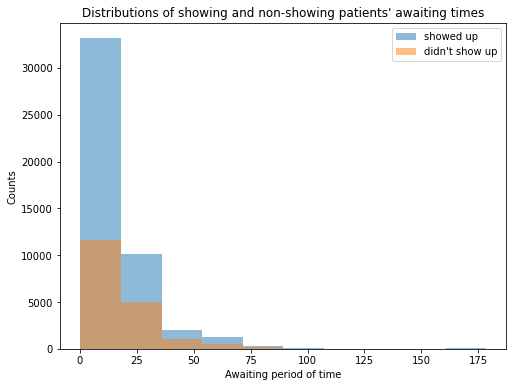

In [75]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist((new_showed['diff']/ np.timedelta64(1,'D')), alpha=0.5, label="showed up")
ax.hist((new_not_showed['diff']/ np.timedelta64(1,'D')), alpha=0.5, label="didn't show up")
ax.set_title("Distributions of showing and non-showing patients' awaiting times")
ax.set_xlabel('Awaiting period of time')
ax.set_ylabel('Counts')
plt.legend(loc='upper right')
plt.show()

> *most probably, the period of time patient has to wait until his appointment day does not have that markable effect on absence.*

###**(Question 2):** What other factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment ?



**Looking at summary statistics on both datasets**

In [76]:
new_not_showed.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
count,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390
mean,35.705111,0.116531,0.175367,0.067265,0.030506,0.017618,0.509353,16 days 15:53:39.490048941
std,21.431618,0.320869,0.380291,0.250487,0.171979,0.145685,0.499926,16 days 16:52:23.997498858
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 03:19:13
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 12:46:44.500000
50%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12 days 10:58:27
75%,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24 days 14:31:51.250000
max,98.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01


In [77]:
new_showed.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
count,47105.000000,47105.000000,47105.000000,47105.000000,47105.000000,47105.000000,47105.000000,47105
mean,41.183441,0.086233,0.230167,0.080310,0.024010,0.020911,0.529965,14 days 10:16:19.604712880
std,22.410647,0.280711,0.420944,0.271775,0.153082,0.156005,0.499107,16 days 11:08:39.676727907
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 03:16:20
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 10:47:17
50%,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7 days 14:47:26
75%,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20 days 14:34:03
max,98.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:17:18


**Quick Viewing to histograms and relationships among numerical variables of each of the *(new_showed)* and the *(new_not_showed)* datasets** 

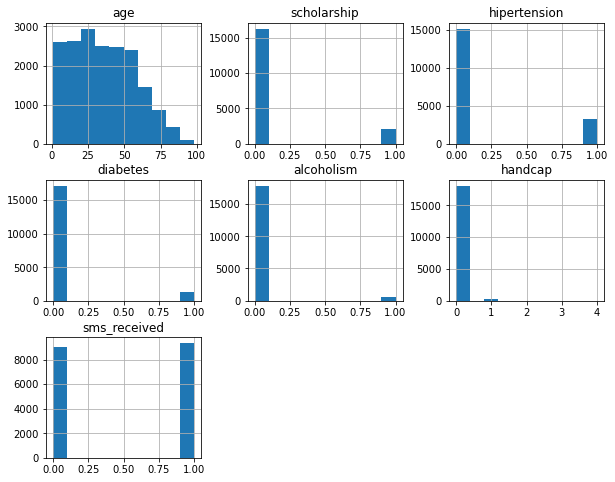

In [78]:
new_not_showed.hist(figsize=(10,8));

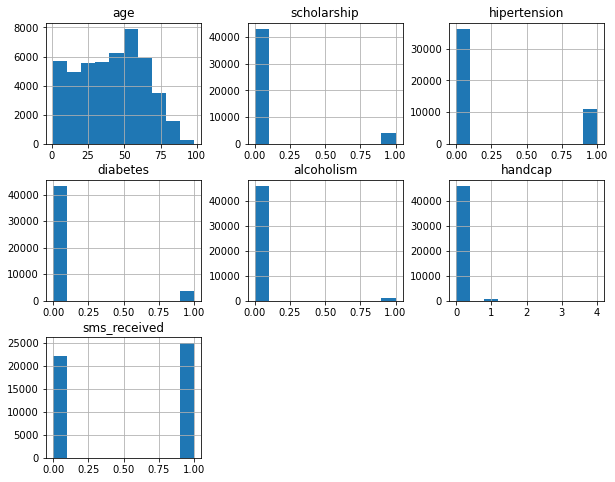

In [79]:
new_showed.hist(figsize=(10,8));

> *Age Average distribution in showing up patients dataset seems to be higher..! -Concluded from both describtive summary and the histogram-*

> *For now, Other numerical attributes don't seem to be showing that huge difference between the 2 datasets,* **but let's have a closer look at some of them:**

1.  **Viewing a subplot histogram of Age attribute in both dataframes:**





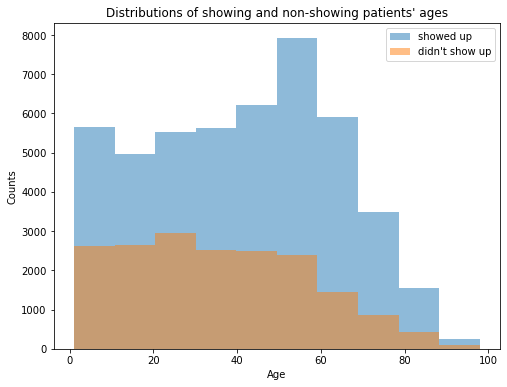

In [80]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(new_showed['age'], alpha=0.5, label="showed up")
ax.hist(new_not_showed['age'], alpha=0.5, label="didn't show up")
ax.set_title("Distributions of showing and non-showing patients' ages")
ax.set_xlabel('Age')
ax.set_ylabel('Counts')
plt.legend(loc='upper right')
plt.show()

>*Age attribute does show some difference in the ranges and distributions, but still not that huge one. But* **generally, on average, showed up patients tend to have higher ages than those who didn't**

**Viewing a subplot of distribution of hipertension attribute in both datasets** 

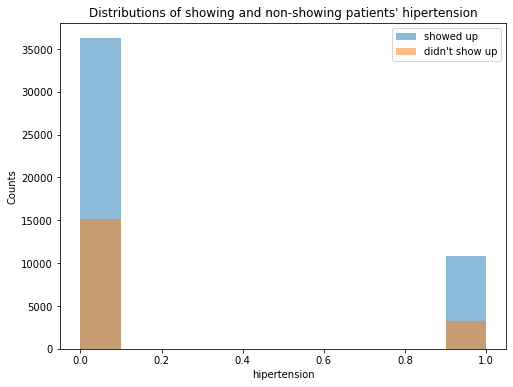

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(new_showed['hipertension'], alpha=0.5, label="showed up")
ax.hist(new_not_showed['hipertension'], alpha=0.5, label="didn't show up")
ax.set_title("Distributions of showing and non-showing patients' hipertension")
ax.set_xlabel('hipertension')
ax.set_ylabel('Counts')
plt.legend(loc='upper right')
plt.show()

>*Doesn't really show difference in averages.* 

> But basically, mainly,on exploring any of the (**scholarship,	hipertension,	diabetes,	alcoholism,	handcap	or sms_received**) attributes, since we are dealing with **"categorical data"**, then it's going to make more sense and be a little more accurate if we look at the ***Median value***..
 
>*Till now, in this case, we are still having all median values of all  our categorical numerical attributes the same among the 2 datasets.*


2. **Viewing a bar chart, median and mean value of each "sms_recieved" input within both datadrames**

Non-showing median:  1.0 	Showing median:  1.0
Non-showing mean: 0.5094 	 Showing mean: 0.5300


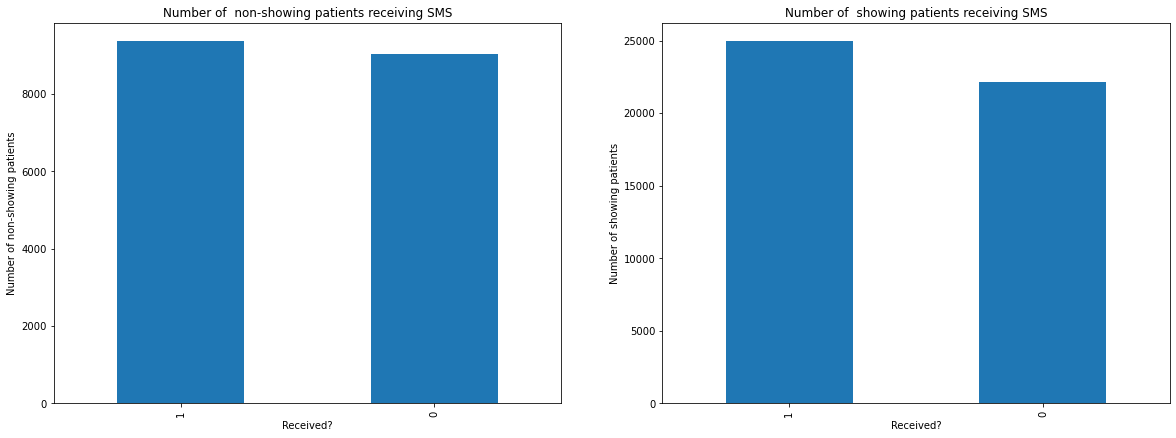

In [92]:
plt.figure(figsize = [20, 7]) 

plt.subplot(1, 2, 1)
new_not_showed['sms_received'].value_counts().plot(kind='bar')
plt.title("Number of  non-showing patients receiving SMS")
plt.xlabel("Received?")
plt.ylabel("Number of non-showing patients");
i= new_not_showed['sms_received'].value_counts().index

plt.subplot(1, 2, 2)
new_showed['sms_received'].value_counts()[i].plot(kind='bar');
plt.title("Number of  showing patients receiving SMS")
plt.xlabel("Received?")
plt.ylabel("Number of showing patients");

print("Non-showing median: ",new_not_showed['sms_received'].quantile(0.5), "\tShowing median: ",new_showed['sms_received'].quantile(0.5))
print("Non-showing mean: {:0.4f}".format(new_not_showed['sms_received'].mean()), "\t","Showing mean: {:0.4f}".format(new_showed['sms_received'].mean()))


>*Median values and Averages are approximately the same; but, roughly speaking, we can still say that people receiving SMS's in the **showing dataset** are more than those who don't, And with a slightly higher average mean value than those who received sms's in the other dataset.*




**Viewing relationships among numerical variables**

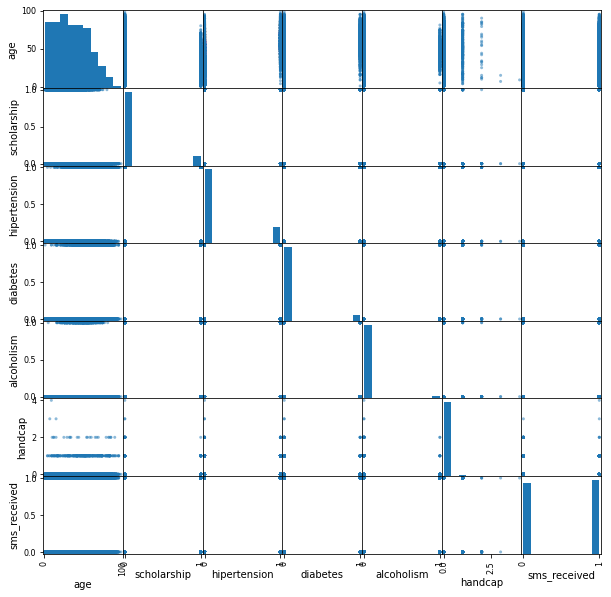

In [ ]:
pd.plotting.scatter_matrix(new_not_showed, figsize=(10,10));

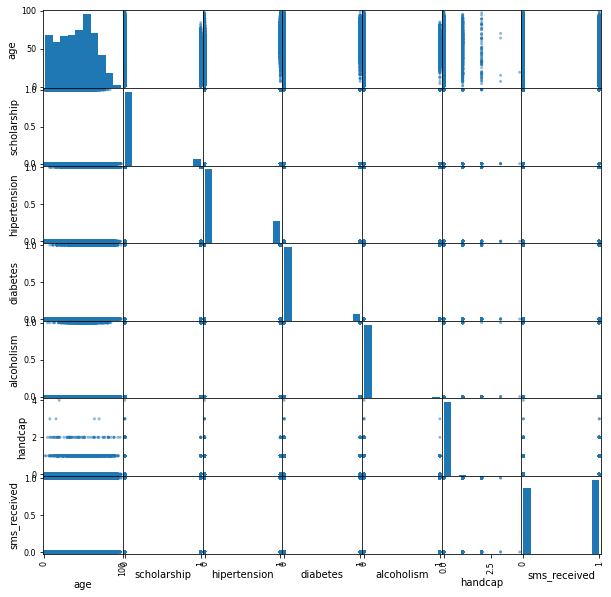

In [ ]:
pd.plotting.scatter_matrix(new_showed, figsize=(10,10));


> *Doesn't seem that there are correlations among the data's numerical variables*




***Having a look at non-numerical attributes***

* **gender attribute**

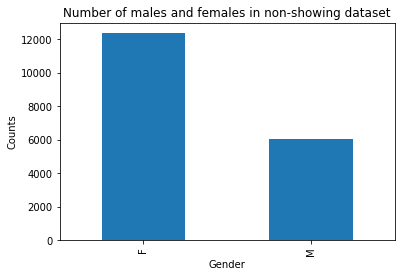

In [ ]:
new_not_showed['gender'].value_counts().plot(kind='bar')
plt.title("Number of males and females in non-showing dataset")
plt.xlabel("Gender")
plt.ylabel("Counts");

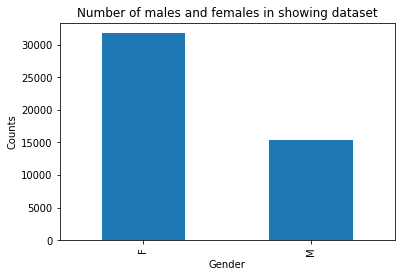

In [ ]:
new_showed.gender.value_counts().plot(kind="bar")
plt.title("Number of males and females in showing dataset")
plt.xlabel("Gender")
plt.ylabel("Counts");

> **Trying to convert gender attribute from object to be numerical categorical and view its median and mean values in each dataset**.

In [ ]:
encode1= new_not_showed['gender'].replace("M", 0).replace("F",1)
encode2= new_showed['gender'].replace("M", 0).replace("F",1)

In [ ]:
print("Median Values for 'gender' attribute in each dataset:\n\n","non-showing: " ,encode1.quantile(q=0.5),"\t", "showing: " ,encode2.quantile(q=0.5))

Median Values for 'gender' attribute in each dataset:

 non-showing:  1.0 	 showing:  1.0


In [ ]:
print("Mean Values for 'gender' attribute in each dataset:\n\n","non-showing: " ,encode1.mean(),"\t", "showing: " ,encode2.mean())

Mean Values for 'gender' attribute in each dataset:

 non-showing:  0.6725938009787928 	 showing:  0.674556841099671


 >As shown, there's almost no difference between mean values, or median values of ['gender'] in both datasets.

 >*Females are more than males in both datasets..*


In [ ]:
new_not_showed.columns

Index(['patient_id', 'gender', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'diff'],
      dtype='object')

* **Neighbourhood attribute**

In [115]:
print(new_showed['neighbourhood'].describe(),'\n\n',new_not_showed['neighbourhood'].describe())

count              47105
unique                79
top       JARDIM CAMBURI
freq                3475
Name: neighbourhood, dtype: object 

 count              18390
unique                80
top       JARDIM CAMBURI
freq                1206
Name: neighbourhood, dtype: object


In [96]:
set(new_not_showed['neighbourhood'].unique())-set(new_showed['neighbourhood'].unique())

{'ILHAS OCEÂNICAS DE TRINDADE'}

In [107]:
new_not_showed['neighbourhood'].value_counts()['ILHAS OCEÂNICAS DE TRINDADE']

2

>The Same location is the one that is most repeated in both dataframes (JARDIM CAMBURI). However, we can see that **there is a location in the non-showing dataset that's not present in the showing one**.

**Viewing bar plots:**

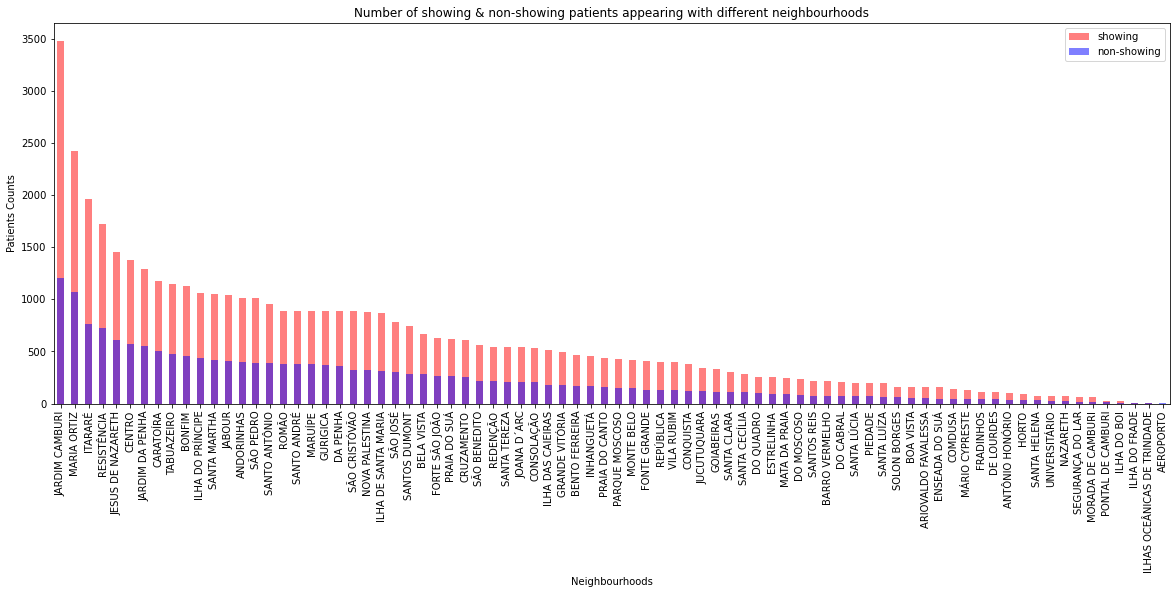

In [113]:
fig = plt.figure(figsize=(20,7))
# i= new_showed['neighbourhood'].value_counts().index
new_showed['neighbourhood'].value_counts().plot(kind='bar', alpha=0.5, color= 'red', label= 'showing')
new_not_showed['neighbourhood'].value_counts().plot(kind='bar', alpha=0.5, color= 'blue', label= 'non-showing')
plt.title("Number of showing & non-showing patients appearing with different neighbourhoods")
plt.xlabel("Neighbourhoods")
plt.ylabel("Patients Counts")
plt.legend();

> *Although number of patients appear to be showing is higher in almost all the cities/locations ,there are some locations other than the top-frequenced location(which is common in both dfs) that appear with unneglectable numbers of non-showing patients, also, there is one location that's present in the non-showing dataset and not in the other, but we only had 2 patients from that location.*

>Top 3 locations frequencing here are **(( JARDIM CAMBURI , MARIA ORTIZ , ITARARE))**.

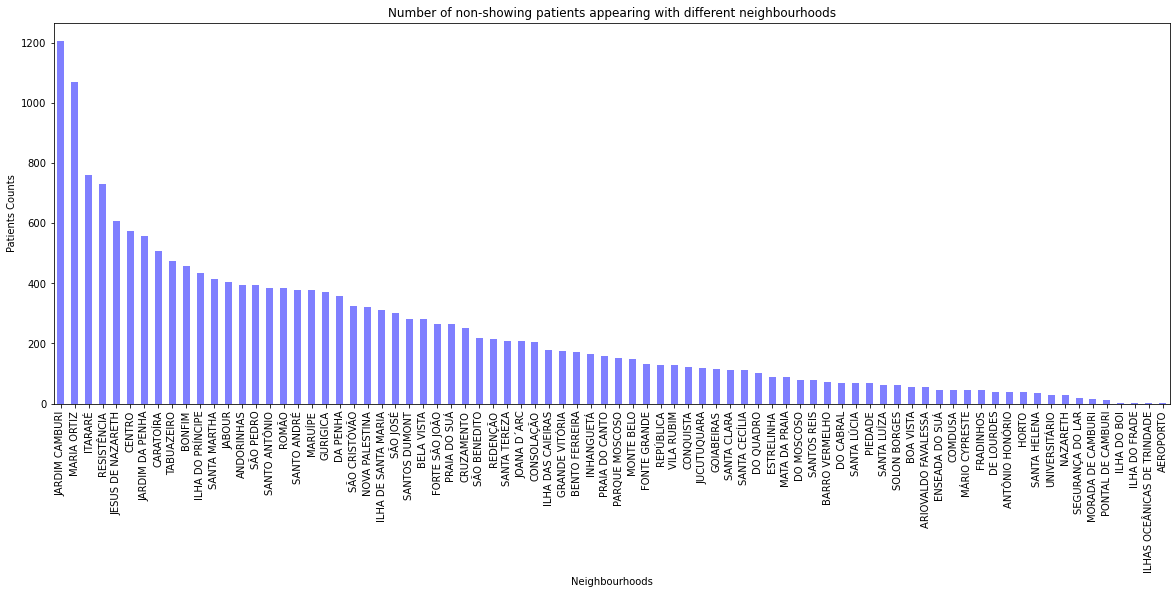

In [102]:
# fig = plt.figure(figsize=(20,7))
# new_not_showed['neighbourhood'].value_counts().plot(kind='bar', alpha=0.5, color= 'blue', label= 'non-showing')
# plt.title("Number of non-showing patients appearing with different neighbourhoods")
# plt.xlabel("Neighbourhoods")
# plt.ylabel("Patients Counts");

**Looking at locations existing in a particular dataset and not in the other**

In [ ]:
arr=new_not_showed['neighbourhood'].value_counts().index


In [ ]:
arr2= new_showed['neighbourhood'].value_counts().index

In [ ]:
not_there=~(arr.isin(arr2))
not_there

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False])

In [ ]:
new_showed[~new_showed['neighbourhood'].isin(arr)]

,patient_id,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff


In [ ]:
new_not_showed[~new_not_showed['neighbourhood'].isin(arr2)]

,patient_id,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff
48754,534986855114.0,F,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,28 days 11:34:17
48765,7256429752481.0,F,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,28 days 11:33:47


>*There is only **1 location** that exists in the non-showing patients' dataset and not showing in the other, but it's only existing 2 times through the whole 18390 dataframe records..*



* **Appointment ID attribute**

In [ ]:
new_not_showed['appointment_day'].apply(lambda x: x.strftime("%m/%d/%Y, %H:%M:%S"))
new_showed['appointment_day'].apply(lambda x: x.strftime("%m/%d/%Y, %H:%M:%S"))

5         04/29/2016, 00:00:00
9         04/29/2016, 00:00:00
10        04/29/2016, 00:00:00
12        04/29/2016, 00:00:00
13        04/29/2016, 00:00:00
                  ...         
110522    06/07/2016, 00:00:00
110523    06/07/2016, 00:00:00
110524    06/07/2016, 00:00:00
110525    06/07/2016, 00:00:00
110526    06/07/2016, 00:00:00
Name: appointment_day, Length: 47105, dtype: object

In [ ]:
j=new_not_showed['appointment_day'].value_counts().index 
k=new_showed['appointment_day'].value_counts().index

In [ ]:
new_not_showed[~new_not_showed['appointment_day'].isin(k)]

,patient_id,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff


In [ ]:
new_showed[~new_showed['appointment_day'].isin(j)]

,patient_id,gender,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff


**Viewing a legend plot**

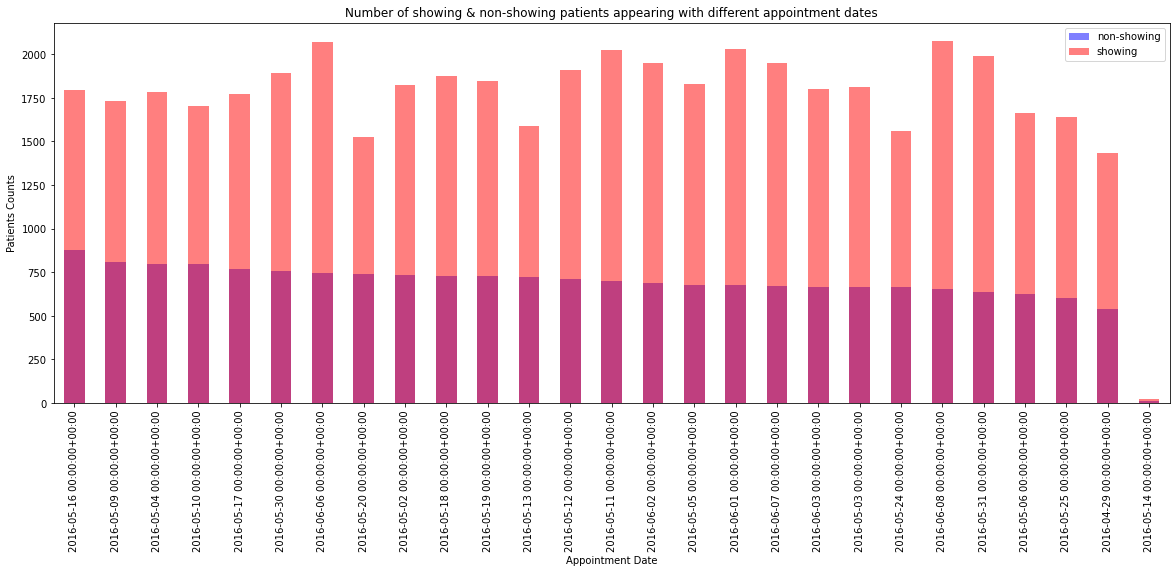

In [ ]:
fig = plt.figure(figsize=(20,7))

new_not_showed['appointment_day'].value_counts()[j].plot(kind='bar', alpha=0.5, color= 'blue', label= 'non-showing')
new_showed['appointment_day'].value_counts()[j].plot(kind='bar', alpha=0.5, color= 'red', label= 'showing')
plt.title("Number of showing & non-showing patients appearing with different appointment dates")
plt.xlabel("Appointment Date")
plt.ylabel("Patients Counts")
plt.legend();

**Viewing a singular plot for appointment_day attribute in non-showing dataset:**

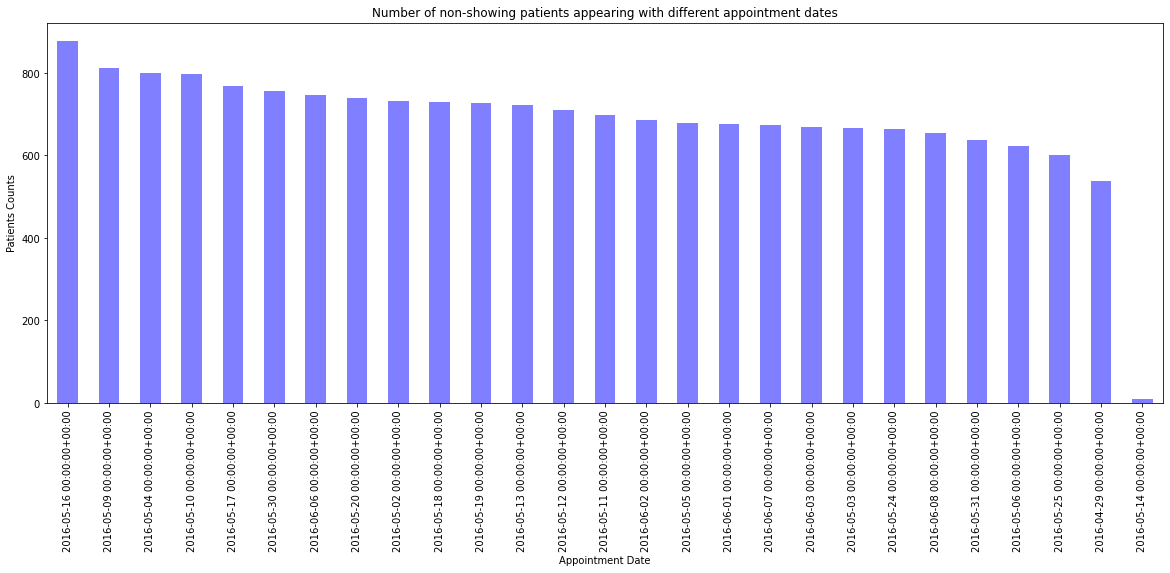

In [ ]:
fig = plt.figure(figsize=(20,7))
new_not_showed['appointment_day'].value_counts()[j].plot(kind='bar', alpha=0.5, color= 'blue', label= 'non-showing')
plt.title("Number of non-showing patients appearing with different appointment dates")
plt.xlabel("Appointment Date")
plt.ylabel("Patients Counts");

> *There're no particular days that exist in one dataset and do not exist in the other, but there are some days that number of non-showing people appear to come higher*

>*The top date of non-showing cases here is that of **((16-05-2016 00:00:00))**.*

In [ ]:
new_not_showed['handcap'].value_counts()

0    18097
1      266
2       24
3        2
4        1
Name: handcap, dtype: int64

<a id='conclusions'></a>
## Conclusions



> ### Results Presentation

As discussed within the exploration topic, I have concluded that the most effective attributes that actually can be having a sort of the impact on the absence are: **(("Age", "SMS-recieved", "Neighbourhood" and "appointment_id"))** **attributes**.


**Age:**
> *We have mentioned that **higher ranges of Ages** appear to **show more** than others with smaller age ranges, inferring to mean values of each..*


In [ ]:
new_not_showed['age'].mean(), new_showed['age'].mean()

(35.70511147362697, 41.18344124827513)

**SMS_receiving:**
> *We also mentioned that receiving SMS's may be having a sort of impact **(although it appears to be very small)**; people who appeared to be receiving SMS's in the showing dataset are more than those who didn't, and that showing dataset make a slightly higher mean value of people receiving messages than that of the other dataset..*

In [ ]:
new_not_showed['sms_received'].mean(), new_showed['sms_received'].mean()

(0.509352909189777, 0.5299649718713513)

**Neighbourhood:**
>*We have reached that there was some locations frequencing more than others with non-showing patients, so maybe that's something to keep note of!*

In [ ]:
new_not_showed['neighbourhood'].value_counts().head(3)

JARDIM CAMBURI    1206
MARIA ORTIZ       1071
ITARARÉ            761
Name: neighbourhood, dtype: int64

**Appointment_Day:**
>*We have concluded that there was dates that was meeting more number of non-showing patients, top of which was **((16-05-2016 00:00:00))**.*

In [ ]:
new_not_showed['appointment_day'].describe().iloc[2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Timestamp('2016-05-16 00:00:00+0000', tz='UTC')

**Concluding That:** 
* Maybe patients with higher ages need some more healthcare, and so they most happen to commit to their appointments more than younger people..

* Maybe sometimes people who don't receive messages confirming their appoinments forget them or thinking they had been canceled..

* Maybe these specific locations of hospitals are far from some people, or maybe they are at an inconvenient place..

* Maybe those particular dates were some official holidays, or maybe their times meets some people's working time..

**Hence:** 
* This could be a good inspiration for hospitals and doctors clinics to maybe increase and inhance their services to be more suitable and satisfies old patients..And maybe to present some offers to attract this category of young people who maybe make less incomes.

* Hospitals and clinics can care more about hiring efficient secretaries or whoever people or softwares in charge of sending confirmatory SMS's regularly.

* Maybe hospitals or clinics could figure out or collect some patients' oppinions and evaluations on their location, perhaps they would change it or have another one. 

> ### Limitations

* **Data Size:**


>*Data size was pretty much too big, specially that there was too much rows that had been dropped, meaning that they were errant or redundant data.*

>*Also that there was a sort of bias towards the showing_up patients, even after wrangling and cleaning up the data, the splitted new_showed dataframe was still almost 3 times larger than the other new_not_showed one..!!*   Which cosequently ofcourse had an impact on the analysis and visualization.

* **Dataset Sufficiency:**

>*An unneglectable part of the dataset was dropped due to its redundancy or the case of it being error-input data.*

>Additionly, there were some column values that weren't the best descriptive , such as the **4 "handcap" categories**; specially that they were unevenly destriputed, which appeared obviously in the visualization part; **category (0)** is dominating, while latest or further categories (especially those greater than **1**) are not even appearing on the plot..!!

>*Lastly, we ultimately still weren't able to mention features to be certainly having that **"huge impact"** on the prediction of attendence of patients!*

<a id='conclusions'></a>
## Conversion to HTML

In [ ]:
!jupyter nbconvert --to html investigate-a-dataset-template-lastVersion.ipynb

[NbConvertApp] Converting notebook investigate_a_dataset_template.ipynb to html
[NbConvertApp] Writing 1011449 bytes to investigate_a_dataset_template.html
